# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b> Machine Learning Intro Overview </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Makine Öğrenimi Model Geliştirme Süreci

Makine öğrenimi, veri bilimi alanında güçlü bir araç olup, verileri analiz etmemizi ve tahminsel modeller oluşturmamızı sağlar. Bu notebook, **Titanic veri setini kullanarak makine öğreniminin temel adımlarını** açıklayan **başlangıç seviyesi bir rehber** niteliğindedir. Yüksek doğruluk elde etmek yerine, **temel makine öğrenimi kavramlarını ve en iyi uygulamaları** adım adım ele alacağız.  

**Bu Çalışmada Neler Ele Alınacak?**  

Bu notebook, **makine öğrenimi model geliştirme sürecinin** temel aşamalarını içermektedir:  

- **Veri Temizleme ve Ön İşleme** – Eksik verilerin işlenmesi  
- **Kategorik Değişkenleri Sayısal Hale Getirme** – Metinsel verilerin sayısal formata dönüştürülmesi  
- **Veriyi Eğitim ve Test Setlerine Ayırma** – Model eğitimi ve değerlendirme için veri bölme  
- **Veri Ölçeklendirme (Scaling)** – Sayısal değişkenlerin ölçeklendirilmesi  
- **Model Seçimi ve Eğitimi** – Uygun algoritmanın belirlenmesi ve eğitilmesi  
- **Modeli Test Etme ve Değerlendirme** – Model başarısının ölçülmesi  
- **Çapraz Doğrulama (Cross Validation)** – Modelin genelleme yeteneğinin test edilmesi  
- **Hiperparametre Optimizasyonu** – Modelin performansını artırmak için parametre ayarlamaları  

**Titanic Veri Seti Hakkında**  

Titanic veri seti, **15 Nisan 1912'de RMS Titanic’in batışıyla ilgili gerçek yolcu bilgilerini içermektedir**. Veri setinde **yaş, cinsiyet, sosyo-ekonomik sınıf (Pclass), bilet ücreti (Fare) ve hayatta kalma durumu (Survived) gibi değişkenler bulunmaktadır**. Bu çalışmada, veri setini kullanarak **makine öğrenimi süreçlerini uygulamalı olarak ele alacağız**, ancak yalnızca tahmin doğruluğuna odaklanmayacağız.  

**Bu Notebook'un Amacı**  

**Makine öğrenimi model geliştirme sürecinin temel adımlarını öğrenmek**  
**Veri ön işleme, model seçimi ve değerlendirme gibi kritik aşamaları kavramak**  
**Makine öğrenimi tekniklerini uygulamalı olarak deneyimlemek**  

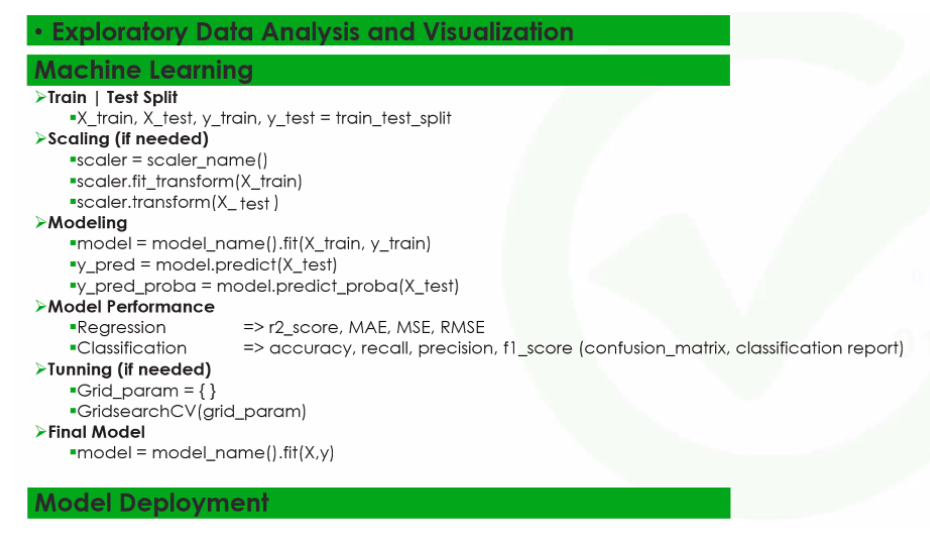

## **Dataset:** Titanic Veri Seti 

**Öncelikle Titanic veri setini yükleyerek veri hakkında genel bir fikir ediniyoruz.**

**Neden Bu Adımı Yapıyoruz?**  
- **Veriyi anlama**: Model eğitmeden önce veri setinin içeriğini görmek önemli.  
- **Sütunlar ve veri tipleri**: Hangi değişkenleri kullanabileceğimizi anlamak için sütunları ve veri türlerini incelemeliyiz.  

In [1]:
# Import Library 

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# DataSet Loading

# Titanic veri setini yükle
df = pd.read_csv("titanic.csv")

# İlk 5 satırı incele
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Veri Temizleme ve Ön İşleme
Veri temizleme, makine öğrenimi projelerinde **en önemli adımlardan biridir**.  
Veriyi düzgün bir hale getirmeden model oluşturmak, **çökmeye yakın bir bina inşa etmek gibidir**.  

### Veri Temizleme Neden Önemlidir?
**Eksik verilerle çalışmak zor olabilir**: Eksik veriler modelin performansını düşürebilir, bu yüzden temizliyoruz.  
**Makine öğrenimi algoritmaları birkaç istisna dışında (örn; catboost) sayısal verilerle çalışır**: **Sex** ve **Embarked** gibi kategorik değişkenleri sayısallaştırarak modelin anlayabileceği forma getiriyoruz.  
**Modelin başarısını artırır.**  

---------------------------------------------------------------------------------------
**Veri Temizleme ve Dönüştürme (Data Cleaning and Transformation)**
Veri temizleme ve dönüştürme, ham veriyi makine öğrenmesi algoritmaları için uygun hale getirme sürecidir. Bu süreç, veri kalitesini artırarak modelin performansını doğrudan etkiler.

**Neden Veri Temizlemeye İhtiyaç Duyarız?**
Ham veriler genellikle aşağıdaki sorunları içerir:

**Missing Values**: Veri setinde bazı özellikler (features) için değerlerin bulunmamasıdır. Bu durum, veri toplama hatalarından, veri birleştirme problemlerinden veya bilgi eksikliğinden kaynaklanabilir.

**Outliers**: Veri setindeki bazı değerlerin, genel dağılımın oldukça dışında olmasıdır. Aykırı değerler, ölçüm hatalarından, veri giriş hatalarından veya gerçek anomalilerden kaynaklanabilir.

**Inconsistent Data (Tutarsız Veri )**: Veri setinde aynı bilgiyi ifade eden fakat farklı formatlarda veya farklı değerlerdeki verilerin bulunmasıdır. Örneğin, aynı şehir adının farklı yazımları veya farklı para birimlerindeki değerler.

**Incorrect Data (Yanlış Veri)**: Veri setinde hatalı, yanlış veya mantıksız verilerin bulunmasıdır. Örneğin, negatif yaş değeri veya imkansız bir ürün fiyatı.


**Veri Temizleme Yöntemleri:**

Eksik Değerlerle Başa Çıkma:

Silme (Deletion): Eksik değer içeren satırları (örnekler) veya sütunları (özellikler) veri setinden çıkarmaktır. Bu yöntem, eksik değerlerin oranının düşük olduğu durumlarda uygundur.

Doldurma (Imputation): Eksik değerleri, mevcut verilerden elde edilen değerlerle (örneğin, ortalama, medyan veya en sık tekrar eden değer) veya daha karmaşık modelleme yöntemleriyle (örneğin, K-NN veya regresyon modelleri) doldurmaktır.

Outliers ile Başa Çıkma:

Silme (Deletion): Aykırı değer içeren satırları veri setinden çıkarmaktır. Bu yöntem, aykırı değerlerin veri setinin genel dağılımını önemli ölçüde bozduğu durumlarda kullanılabilir.

Dönüştürme (Transformation): Veri dağılımını daha simetrik hale getirerek aykırı değerlerin etkisini azaltmaktır. Logaritmik dönüşüm veya karekök dönüşümü gibi yöntemler kullanılabilir.

Sınırlandırma (Capping): Aykırı değerleri belirli bir üst veya alt sınıra çekmektir. Bu yöntem, aykırı değerlerin veri setinde tutulması gerektiği durumlarda uygundur.

Tutarsız Verileri Düzeltme:
Standardizasyon (Standardization): Veri setindeki farklı formatlardaki verileri standart bir formata dönüştürmektir. Bu, aynı bilgiyi ifade eden farklı yazımları düzeltmeyi veya farklı ölçü birimlerini aynı birime çevirmeyi içerebilir.

Yanlış Verileri Düzeltme:

Manuel Düzeltme (Manual Correction): Veri setindeki yanlış verileri manuel olarak inceleyip düzeltmektir. Bu yöntem, veri setinin küçük olduğu ve yanlış verilerin kolayca tespit edilebildiği durumlarda uygundur.

Doğrulama Kuralları (Validation Rules): Veri setine girilen verilerin belirli kurallara uygunluğunu kontrol etmektir. Bu, veri giriş aşamasında hataları önlemeye yardımcı olur.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Eksik değerleri kontrol etme

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Eksik Age değerlerini medyan ile doldurma

df['Age'].fillna(df['Age'].median(), inplace=True)

----------------------------------------------------------------------------------------
Eksik **Age** (yaş) değerlerini **medyan** ile doldurmamızın sebebi, **medyanın aykırı değerlere karşı daha dayanıklı olmasıdır**.  

 **Neden Medyan?**
1. **Aykırı Değerlerin Etkisini Azaltır**  
   - Eğer yaş değişkeninde çok büyük veya çok küçük **aykırı değerler (outliers)** varsa, **ortalama (mean)** bu aykırı değerlerden etkilenerek yanlış bir yönlendirme yapabilir.
   - Medyan (ortanca), veriyi sıraladığımızda tam ortadaki değeri alır ve aşırı büyük/küçük değerlerden etkilenmez.
   
2. **Yaş Gibi Dağılımı Çarpık Olan Verilerde Daha İyi Sonuç Verir**  
   - Titanic veri setinde **Age** değişkeni genellikle normal dağılıma yakın olabilir, ancak çarpık bir dağılım (skewed distribution) gösterme ihtimali de vardır.
   - Çarpık dağılımlarda **ortalama (mean)**, veriyi temsil etmekte yetersiz kalabilir ve modelin performansını olumsuz etkileyebilir.

3. **Gerçekçi Bir Tahmin Sunar**  
   - Eğer bir veri setinde yaş değişkeninin çoğu **20-40 yaş aralığında** yoğunlaşmışsa ve birkaç kişi **80-90 yaşında** ise, ortalama bu büyük değerlere kayabilir.
   - **Medyan**, genellikle **nüfusun çoğunluğunu temsil eden** daha güvenilir bir değerdir.

 **Alternatif Yöntemler**
- **Ortalama (Mean) Kullanmak**  
  ```python
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  ```
  - Eğer verinin **normal dağılıma sahip** olduğunu biliyorsak (örneğin IQ skorları gibi), ortalama daha uygun bir seçenek olabilir.
  
- **Mod (En Çok Tekrar Eden Değer) Kullanmak**  
  ```python
  df['Age'].fillna(df['Age'].mode()[0], inplace=True)
  ```
  - Eğer **kategorik bir değişken** olsaydı (örneğin `Embarked`), en sık görülen değeri atamak mantıklı olabilirdi.

- **KNN Imputer Kullanmak**  
  ```python
  from sklearn.impute import KNNImputer
  imputer = KNNImputer(n_neighbors=5)
  df['Age'] = imputer.fit_transform(df[['Age']])
  ```
  - **K En Yakın Komşu (KNN) ile tahmin** yaparak eksik değerleri doldurabiliriz. Bu yöntem, benzer özelliklere sahip diğer yolcuların yaşını tahmin ederek daha isabetli bir doldurma yapabilir.

**Sonuç**
**Medyan**, özellikle **çarpık dağılımlı ve aykırı değerlere sahip** değişkenlerde **en güvenilir** doldurma yöntemlerinden biridir. Titanic veri setinde yaşın büyük olasılıkla çarpık dağıldığını düşündüğümüz için, **medyan kullanmak en iyi tercih olabilir**

----------------------------------------------------------------------------------------------------------------

In [8]:
# Eksik Embarked değerlerini en sık görülen değer (mode) ile doldurma

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

-----------------------------------------------------------------------------------------------
Eksik **Embarked** değerlerini **mode (en sık görülen değer)** ile doldurmamızın sebebi, **Embarked değişkeninin kategorik bir değişken olmasıdır**.  


 **Neden Mode (Mod)?**
1. **Embarked Kategorik Bir Değişkendir**  
   - **Embarked** sütunu, yolcuların Titanic'e hangi limandan bindiğini gösterir ve kategorik bir değişkendir (örneğin `'S'`, `'C'`, `'Q'`).
   - **Sayısal olmayan verilerde ortalama (mean) veya medyan (median) kullanılamaz.** Çünkü bu istatistikler sadece sayısal değerlerde anlamlıdır.
   - En mantıklı seçenek, **bu değişkenin en sık görülen değerini (mode) kullanarak** eksik verileri doldurmaktır.

2. **Mode (En Çok Tekrar Eden Değer) En Gerçekçi Tahmini Sunar**  
   - Eğer bir veri setinde **bazı kategoriler diğerlerinden çok daha fazla tekrar ediyorsa**, eksik değerleri en sık görülen kategoriyle doldurmak **en olasılıklı tahmin** olur.
   - Örneğin, Titanic veri setinde **Embarked** sütunundaki dağılım şu şekilde olabilir:  
     ```
     S: 70%  (Southampton)
     C: 20%  (Cherbourg)
     Q: 10%  (Queenstown)
     ```
   - Çoğu yolcu Southampton’dan bindiği için (`S` en sık görülen kategori), eksik değerleri `'S'` ile doldurmak en doğru seçim olur.

3. **Veri Dağılımını Bozmadan Eksik Değerleri Doldurur**  
   - **Eksik değerleri rastgele bir kategoriyle doldurmak yerine**, **verinin doğal dağılımını koruyarak** en sık kullanılan değeri atamak veri yapısını bozmamış olur.

---

**Alternatif Yöntemler**
- **Eksik Kategorileri Ayrı Bir Değer Olarak Tanımlamak**  
  ```python
  df['Embarked'].fillna('Unknown', inplace=True)
  ```
  - Eğer eksik verilerin gerçekten önemli bir bilgi taşıma ihtimali varsa, `"Unknown"` gibi özel bir kategori eklenebilir.
  
- **KNN Imputer ile Tahmin Ederek Doldurmak**  
  ```python
  from sklearn.impute import KNNImputer
  import numpy as np

  df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})  # KNN için sayısal hale getiriyoruz
  imputer = KNNImputer(n_neighbors=5)  # Benzer özelliklere sahip 5 komşuya göre tahmin yap
  df['Embarked'] = np.round(imputer.fit_transform(df[['Embarked']])).astype(int)
  ```
  - Bu yöntem, **benzer yolcuların hangi limandan bindiğini analiz ederek eksik Embarked değerlerini daha iyi tahmin edebilir**.

---

 **Sonuç**
 **Mode (mod), kategorik değişkenlerde eksik verileri doldurmak için en mantıklı ve güvenilir yöntemlerden biridir.**  
**Çünkü en sık görülen kategori, yeni eksik veriler için en olası değeri temsil eder.**

 -----------------------------------------------------------------------------------------------

In [9]:
# Çok fazla eksik değere sahip Cabin sütununu kaldırma

df.drop(columns='Cabin', inplace=True)   #inplace=True ile orjinal df üzerinde değişiklik yapılır 

In [10]:
# Kalan eksik değerleri kontrol etme

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Encoding (Kategorik Değişkenleri Sayısal Hale Getirme)

- Makine öğrenimi modelleri birkaç istisna dışında (örn; catboost) yalnızca **sayısal verilerle çalışabilir**.  
- Bu nedenle **kategorik değişkenleri (örneğin cinsiyet, liman, şehir vb.) modelin anlayabileceği sayılara çevirmemiz gerekir**.  

- Bu dönüşüme **Encoding (Kodlama)** adı verilir.  

### Encoding Nedir? Neden Yapılır?
Encoding, kategorik değişkenleri **sayısal değerlere dönüştürme işlemidir**.  
Eğer verinizde **"Male", "Female"**, **"C", "Q", "S"** gibi **metinsel veriler** varsa, bunları **0, 1, 2 gibi sayılarla değiştirmemiz gerekir**.  

**Neden Encoding Kullanılır?**  
**Makine öğrenimi algoritmaları metinleri anlamaz** → Sayılara çevirmeliyiz.  
**Doğru feature engineering (özellik mühendisliği) yapmamızı sağlar** → Doğru formatta veri ile daha iyi modelleme yaparız.  
**Daha iyi model performansı sağlar** → Yanlış encoding kullanımı, modelin yanlış öğrenmesine sebep olabilir.  

### Encoding Türleri (Ne Zaman Hangi Yöntem Kullanılır?)

**One-Hot Encoding (Tekil Kodlama)**  
- **Kategorik değişkenin her bir sınıfı için ayrı bir sütun oluşturur.**  
- Eğer **"Male" ve "Female"** gibi iki kategori varsa:  
  - **"Male" → [1, 0]**,  
  - **"Female" → [0, 1]** şeklinde dönüşüm yapılır.  
- **Avantajı**: Sıralı bir ilişki olmadığından model yanlış öğrenmez.  
- **Dezavantajı**: Çok fazla kategori varsa (örneğin 100 farklı şehir) çok fazla yeni sütun oluşur (**boyutsallık laneti - curse of dimensionality**).  

**Ordinal Encoding (Sıralı Kodlama)**  
- **Sıralı kategoriler için uygundur.**  
- Örneğin eğitim seviyesi:  
  - **"İlkokul" → 0, "Lise" → 1, "Üniversite" → 2, "Yüksek Lisans" → 3**  
- **Avantajı**: Sıralı bilgiyi korur.  
- **Dezavantajı**: Sadece gerçekten sıralı verilerde kullanılmalıdır.

### One-Hot Encoding kullanmamızın sebebi:
- "Sex" ve "Embarked" değişkenleri **sıralı (ordinal) bir veri değil**.  
- **Label Encoding kullanırsak**, model "Male" ve "Female" arasında sıralı bir ilişki olduğunu düşünebilir.  
- Aynı şekilde, **Embarked sütunu 'C', 'Q', 'S' gibi değerler içeriyor ve bunların arasında sıralı bir ilişki yok**.

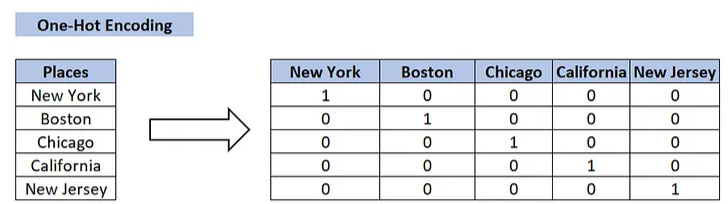

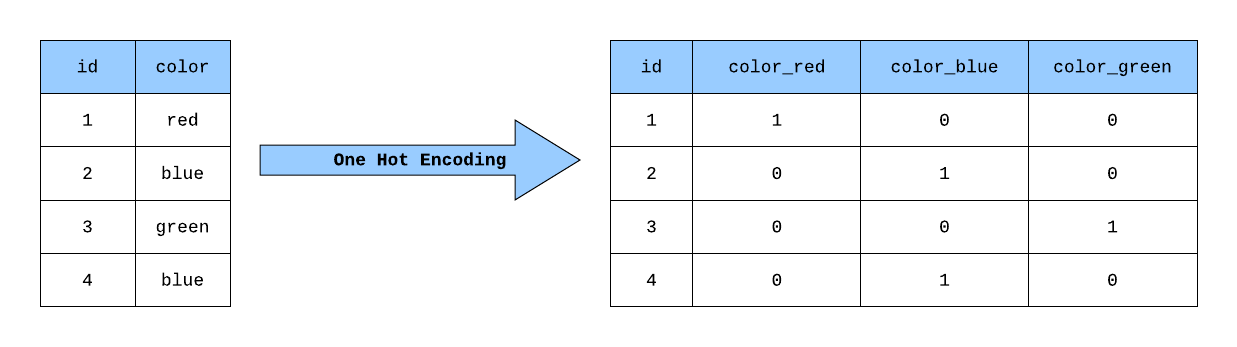
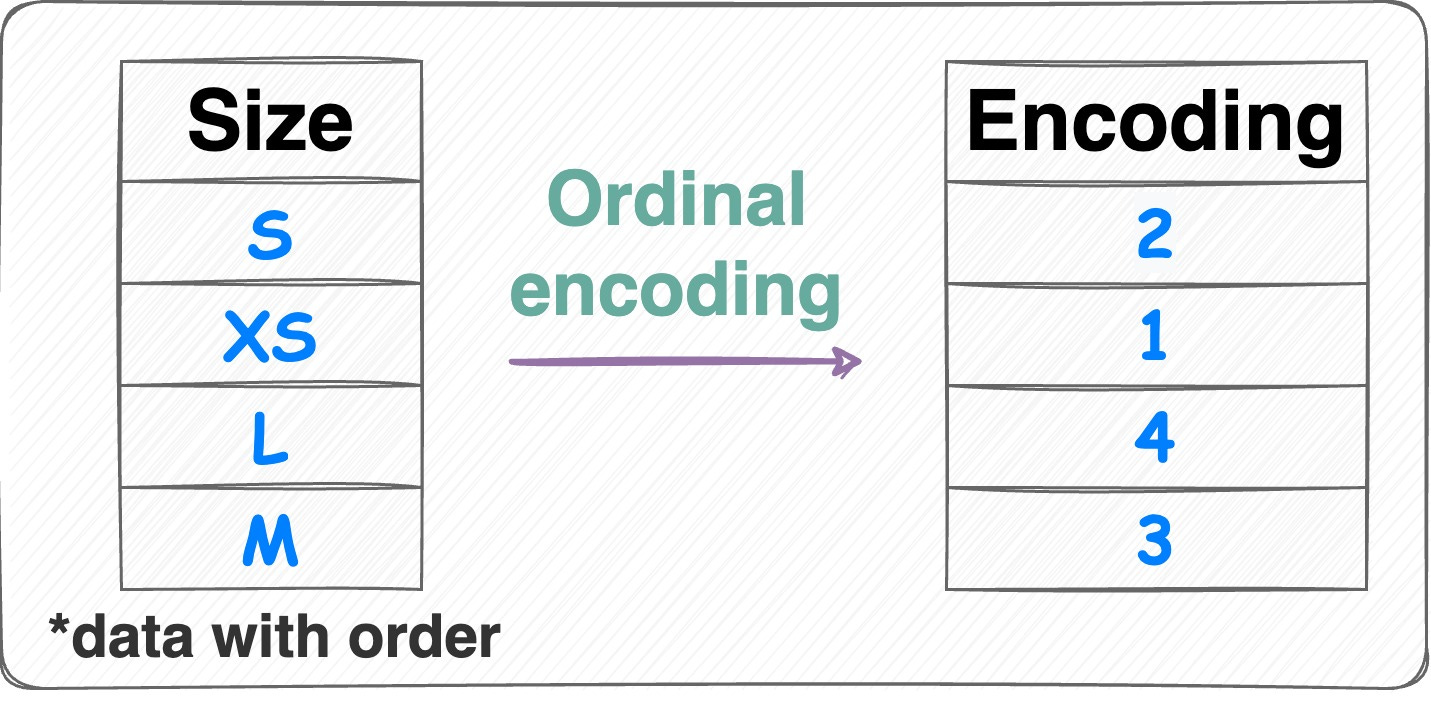

**Label Encoding:** Her kategorik değeri, benzersiz bir tamsayıya dönüştürür. Örneğin, "Kırmızı" -> 0, "Mavi" -> 1, "Yeşil" -> 2 şeklinde dönüştürme yapılır. Bu yöntem, kategorik değerler arasında bir sıralama olduğu durumlarda veya ağaç tabanlı algoritmalar kullanılırken uygundur. Ancak, kategorik değerler arasında bir sıralama yoksa, bu yöntem modelin yanlış öğrenmesine neden olabilir. 
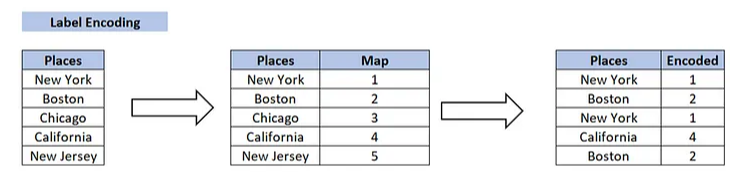


**Ordinal Encoding**: Kategorik değerler arasında bir sıralama varsa (örneğin, "Küçük", "Orta", "Büyük"), bu sıralamayı koruyan bir encoding yöntemidir. Bu yöntemde, her kategoriye sıralamaya uygun bir tamsayı değeri atanır.
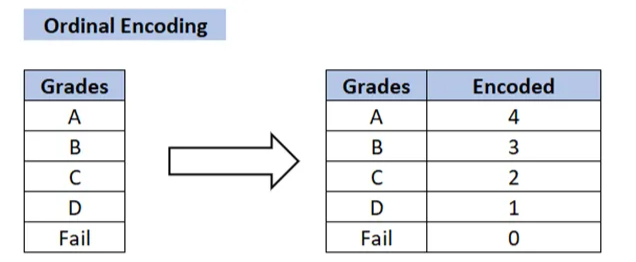


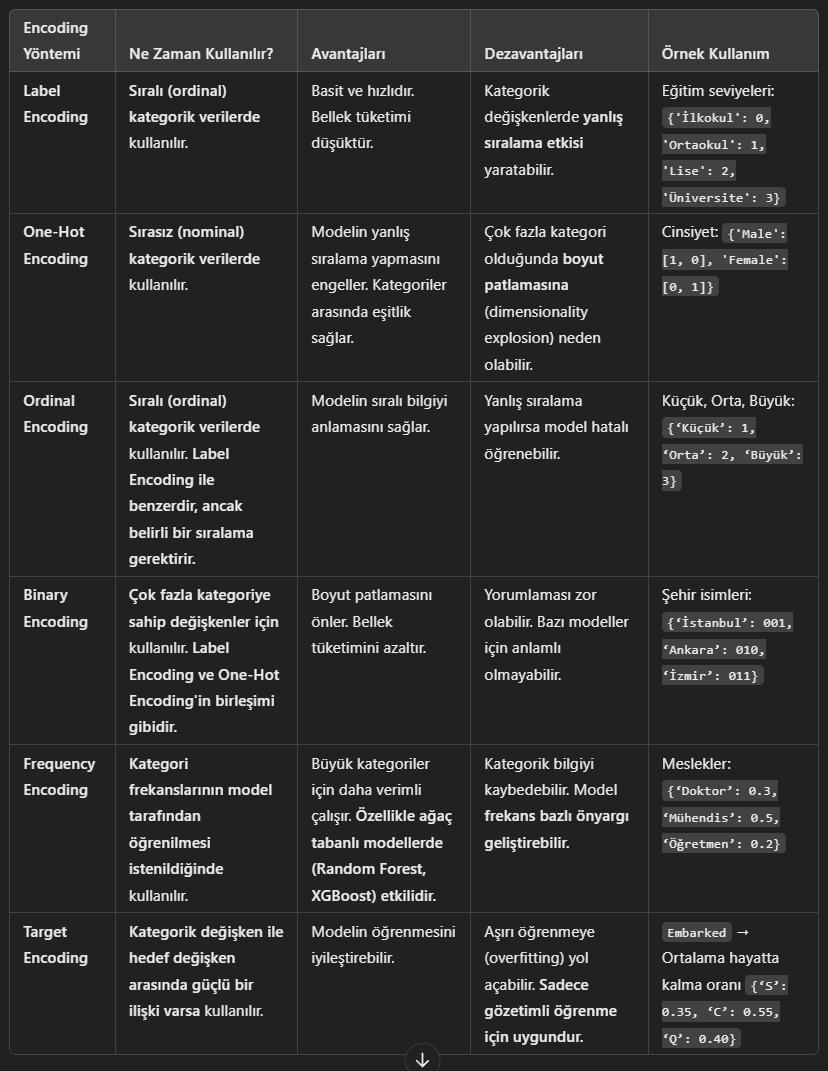

In [13]:
# One-Hot Encoding işlemi

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' ile bir sütunu düşürerek multicollinearity (çoklu doğrusal bağlantı) sorununu önleriz.
# sparse_output=False ile sonucu sparse matrix (seyrek matris) yerine numpy array olarak döndürür

# Kategorik olan Cinsiyet (Sex) ve Liman (Embarked) sütunlarını One-Hot Encoding ile dönüştürelim
encoded_columns = encoder.fit_transform(df[['Sex', 'Embarked']])  #ustteki encoder nesnesini veriye uygular ve veriyi dönüştürür

#Bu dönüşüm sayesinde "Male" ve "Female", "S", "C", "Q" kategorileri sayısal olarak ifade edilir.

# Yeni sütun isimlerini belirleyelim
column_names = encoder.get_feature_names_out(['Sex', 'Embarked']) # Sex_Male , Sex_Female ve 'Embarked_C', 'Embarked_Q', 'Embarked_S' isimleri oluşacak

# One-Hot Encoding sonucu oluşan numpy array'ini DataFrame'e çevirelim
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

# Orijinal veri setine ekleyelim ve artık kullanılmayan sütunları kaldıralım
df = df.drop(['Sex', 'Embarked'], axis=1)  # Orijinal sütunları kaldırıyoruz
df = pd.concat([df, encoded_df], axis=1)  # Yeni sütunları ekliyoruz

# Son haliyle veriyi görelim
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,1.0


## Veriyi Eğitim ve Test Setlerine Ayırma  

### Eğitim-Test Ayrımı Nedir?
Makine öğrenimi modelleri, verilen **eğitim verisi (training data) üzerinde öğrenir** ve daha önce görmediği **test verisi (test data) ile değerlendirilir**.  

**Eğer model sadece eğitim verisi ile test edilirse, modelin gerçek dünyada ne kadar iyi performans gösterdiğini anlayamayız.**  

Bu yüzden, veri setimizi **eğitim (train) ve test (test) olmak üzere ikiye ayırırız**.  

### Neden Bu Adımı Yapıyoruz?  

**Modelin başarısını değerlendirmek için**  
- Modelin yalnızca **öğrendiği verilerde** iyi olması yeterli değildir.  
- Modelin **hiç görmediği verilerde ne kadar iyi tahmin yaptığını** test etmek için test setine ihtiyacımız vardır.  

**Overfitting’i (Aşırı Öğrenmeyi) Engellemek İçin**  
- Eğer **tüm veriyi eğitim için kullanırsak**, model veriyi **ezberleyebilir**.  
- Ezberleyen bir model, **yeni veriler karşısında kötü performans gösterir**.  
- Modeli test verisi ile değerlendirerek **genelleme yeteneğini ölçeriz**.  

**Gerçek Dünya Performansını Anlamak İçin**  
- Gerçek dünyada modelin **bilmediği verilerle karşılaşacağını unutmayalım**.  
- Test seti, modelin gelecekte nasıl çalışacağını tahmin etmemize yardımcı olur.  

### Eğitim-Test Bölme Oranı Seçerken Dikkat Edilmesi Gerekenler  
- Eğer **veriniz azsa**, test setini fazla büyük tutarsanız model yeterince öğrenemeyebilir.  
**Dengesiz sınıflarda veya zaman serilerinde rastgele bölme yerine özel yöntemler kullanılmalıdır.**   

**Eğitim-Test oranı kesin bir kural değildir, problem türüne ve veri setine göre ayarlanmalıdır!**

 
### Eğitim ve Test Setlerine Ayırma (train_test_split Kullanımı) 

Öncelikle **bağımsız değişkenler (X) ve bağımlı değişkeni (y) ayırıyoruz**.  

**Bağımsız değişkenler (X):** Modelin tahmin yaparken kullanacağı özellikler.  
**Bağımlı değişken (y):** Modelin tahmin etmeye çalıştığı hedef değişken (Titanic için **Survived**).  

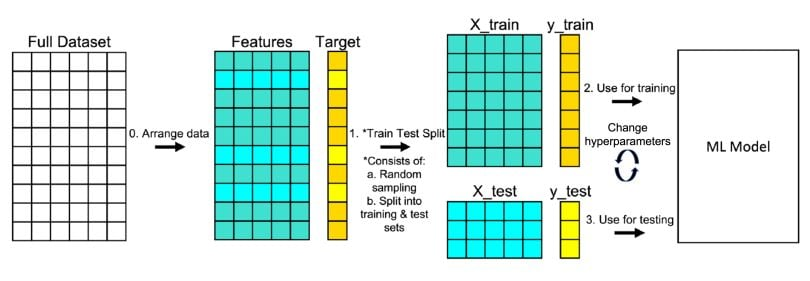

In [16]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y) oluşturma

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])  # drop edilenler hariç tüm sütunlar bağımsız değişken (input)
y = df['Survived']  # 'Survived' sütunu hedef değişken (output) (0 = ölmüş, 1 = hayatta kalmış)

In [17]:
# Eğitim ve test setlerine ayırma

from sklearn.model_selection import train_test_split

# Veriyi %80 eğitim, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Veri Ölçeklendirme (Scaling)  

Makine öğrenimi modellerinde **farklı ölçeklere sahip değişkenler**, modelin öğrenme sürecini ve tahmin performansını doğrudan etkileyebilir.  
Özellikle **mesafe tabanlı algoritmalar (KNN, SVM, K-Means)** ve **gradyan inişi (Gradient Descent) kullanan modeller**, **veri setindeki değişkenlerin ölçek farklarından olumsuz etkilenebilir**.  

Bu nedenle, **veri ölçeklendirme (Scaling) işlemi ile tüm değişkenleri benzer ölçeklere getirerek modelin daha doğru öğrenmesini sağlıyoruz**.  

### Neden Bu Adımı Yapıyoruz?  

**1. Ölçek Farklarından Kaynaklanan Yanlış Öğrenmeyi Engellemek İçin**  
- Eğer veri setinde bazı değişkenler **büyük değerler içerirken**, bazıları **çok küçük değerler içeriyorsa**, model **büyük değerlere sahip değişkenleri daha önemliymiş gibi görebilir**.  
- **Örnek:**  
  - "Fare" (Bilet Ücreti) → **0 ile 500 arasında değişen bir değer**  
  - "SibSp" (Kardeş/Eş Sayısı) → **0 ile 8 arasında değişen bir değer**  
  - **Ölçekleme yapılmazsa, model "Fare" değişkenine daha fazla ağırlık verebilir ve yanlış öğrenebilir.**  

**2. Modelin Daha Hızlı ve Daha Kararlı Öğrenmesini Sağlamak İçin**  
- **Gradient Descent (Gradyan İnişi) kullanılan modellerde (Lojistik Regresyon, Yapay Sinir Ağları, SVM), ölçeklendirme olmazsa öğrenme süreci yavaş ve dengesiz olabilir.**  
- **Ölçekleme, ağırlıkların güncellenmesini daha verimli hale getirir ve modelin daha hızlı öğrenmesini sağlar.**  

**3. Özellikle Mesafe Tabanlı Algoritmalarda Doğru Çalışmayı Sağlamak İçin**  
- **KNN (K-Nearest Neighbors), SVM (Support Vector Machines) ve K-Means gibi algoritmalar, iki nokta arasındaki mesafelere dayandığından, ölçeklendirme yapılmazsa yanlış sonuçlar verebilir.**  
- **Örneğin, bir değişkenin ölçeği diğerlerinden çok büyükse, model o değişkene gereğinden fazla önem verebilir.**  

**4. Modelin Doğru Genelleme Yapmasını Sağlamak İçin**  
- **Doğrusal regresyon, lojistik regresyon ve PCA gibi yöntemlerde ölçek farkları modelin genelleme yeteneğini olumsuz etkileyebilir.**  
- **Ölçeklendirme, modelin tüm değişkenleri eşit şartlarda değerlendirmesine yardımcı olur.**  

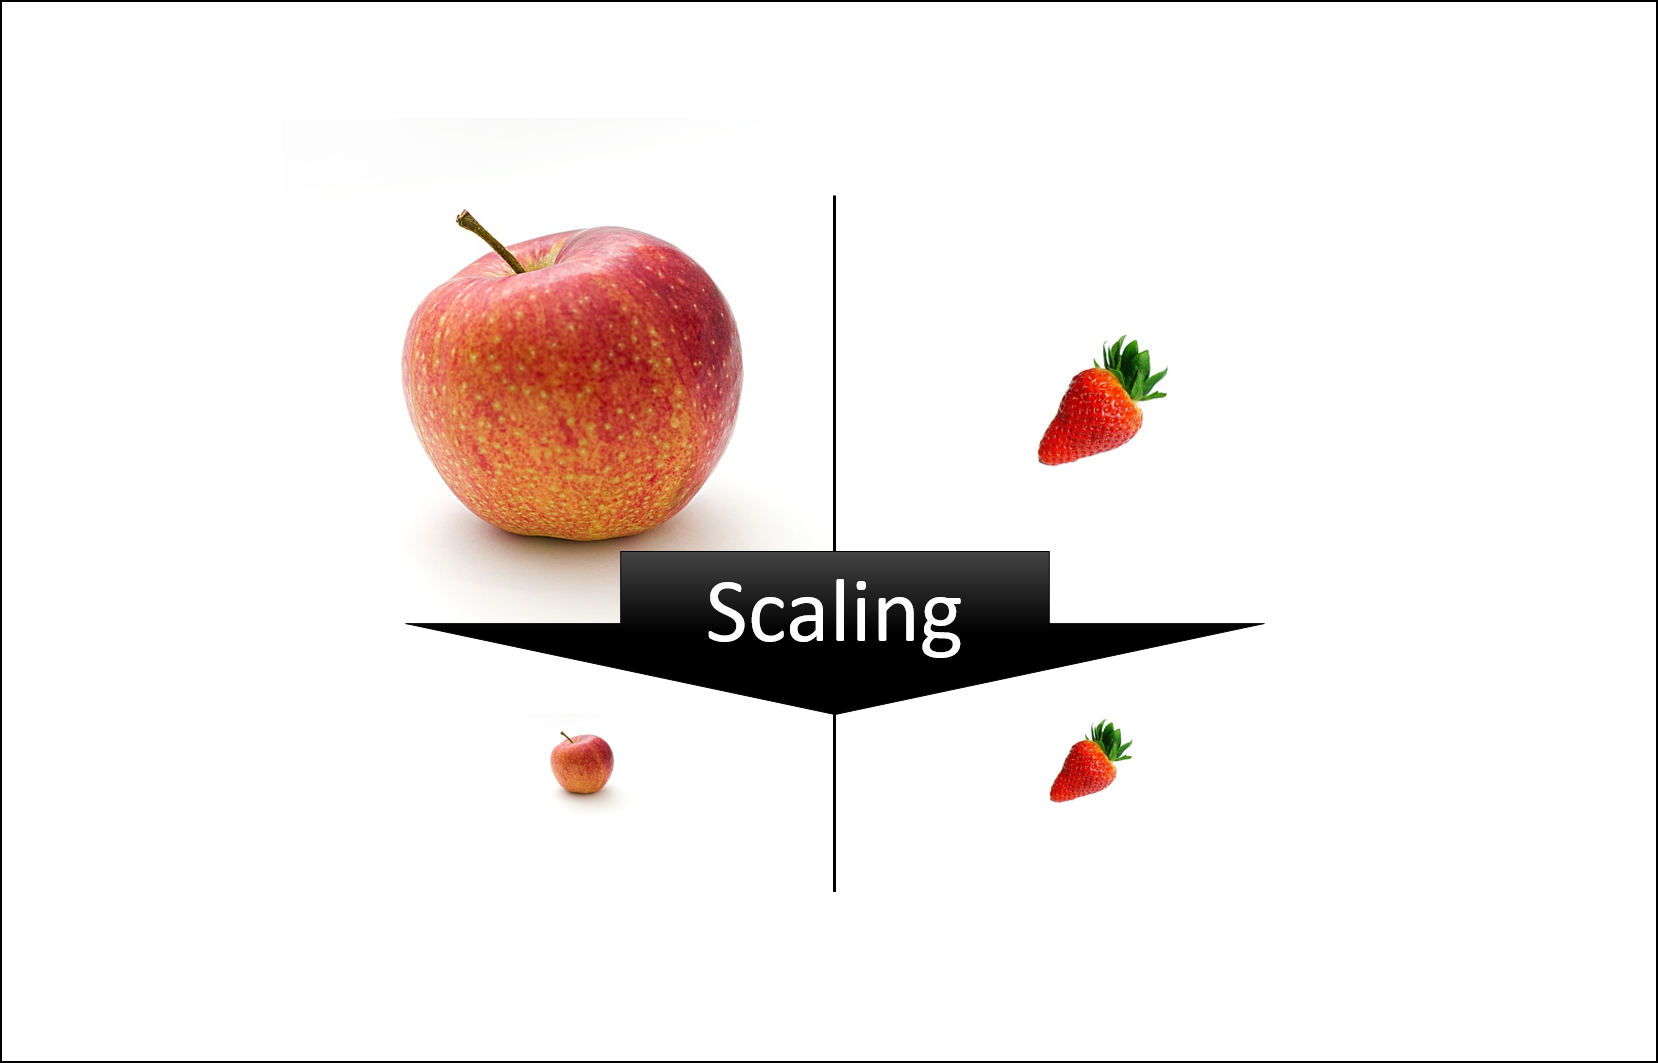
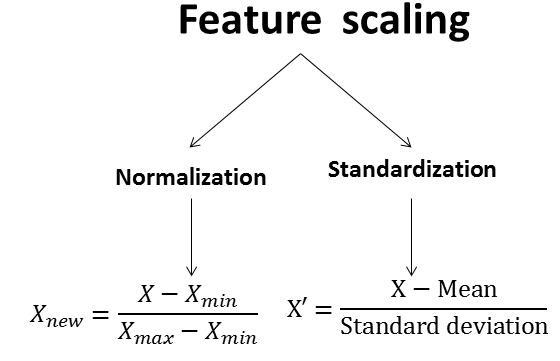

In [20]:
from sklearn.preprocessing import StandardScaler

# StandardScaler ile ölçeklendirme

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Eğitime kullanılan veriyi ölçeklendir
X_test_scaled = scaler.transform(X_test)  # Test verisini de aynı ölçekle dönüştür

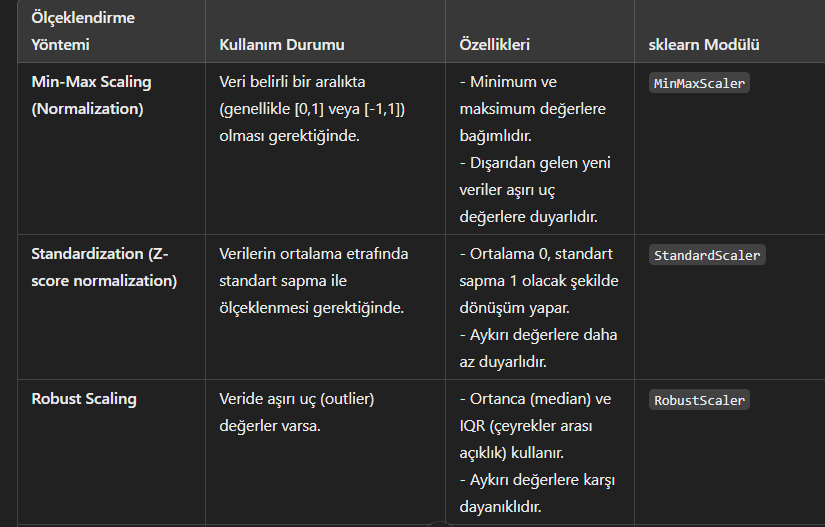

## Model Seçimi ve Eğitimi  

Makine öğrenimi modelini belirleyip **veriler üzerinde eğitiyoruz**.  
Her problem için **en uygun modelin seçilmesi**, modelin doğruluğunu ve genelleme yeteneğini doğrudan etkiler.  

### Neden Bu Adımı Yapıyoruz?  

**Modelin verilerdeki ilişkileri öğrenmesini sağlıyoruz.**  
- Model, giriş (X) ve hedef değişken (y) arasındaki **örüntüleri keşfeder** ve öğrendiği bu bilgileri kullanarak **yeni veriler üzerinde tahmin yapabilir**.  

**Farklı modeller, farklı problemler için daha iyi çalışır.**  
- **Örneğin:**  
  - **Doğrusal ilişkiler** için **Linear Regresyon** veya **Logistic Regresyon** iyi bir seçimdir.  
  - **Karmaşık ve doğrusal olmayan ilişkiler** için **Random Forest** veya **Gradient Boosting Algoritmaları (XGBoost, LightGBM)** daha iyi sonuç verebilir.  

**Random Forest, güçlü ve genelleme yeteneği yüksek bir modeldir.**  
- **Birden fazla karar ağacını birleştirerek çalışan Random Forest, overfitting’i azaltır ve stabil sonuçlar üretir.**  
- **Özellikle küçük ve orta ölçekli veri setlerinde iyi çalışır.**  

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluştur
model = RandomForestClassifier(random_state=42)

# Modeli eğitim verisiyle eğit
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Modeli Test Etme ve Değerlendirme  

Modeli eğittikten sonra, **gerçek dünya verilerinde nasıl performans gösterdiğini ölçmek için test seti üzerinde değerlendirme yapıyoruz**.  
Bir modelin sadece eğitim verisinde iyi çalışması yeterli değildir. **Gerçek dünyada karşılaşacağı yeni verilerde de başarılı olup olmadığını anlamamız gerekir**.  

Bu nedenle, **test seti üzerinde tahmin yaparak modelin doğruluğunu ve detaylı performansını ölçüyoruz**.  

### Neden Bu Adımı Yapıyoruz?  

**1. Modelin Gerçek Dünya Performansını Ölçmek İçin**  
- Model, eğitildiği veri setinde **yüksek doğruluk** almış olabilir, ancak test verisinde başarısız olabilir.  
- **Gerçek dünya verileri üzerinde modelin başarısını değerlendirmek için test seti üzerinde tahminler yapıyoruz.**  

**2. Model Değerlendirme Metrikleri**  

 **Regresyon Modelleri İçin:**  
- Mean Absolute Error (MAE)  
- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- R² (Determination Coefficient)  
- Adjusted R²  

 **Sınıflandırma Modelleri İçin:**  
- Precision  
- Recall (Sensitivity)  
- F1-Score  
- Confusion Matrix  
- ROC-AUC Score

**Özet:**  
**Modelin performansını değerlendirmek için uygun metrikler seçilmelidir.**  
**Farklı metrikler, modelin güçlü ve zayıf yönlerini analiz etmeye yardımcı olur.**  
**Genelleme yeteneğini ölçmek için test verisi veya cross validation yöntemleri kullanılmalıdır.**

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test_scaled)

# Modelin doğruluğunu ve detaylı performansını ölç
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Cross Validation (Çapraz Doğrulama) Nedir?
Veri setini kullanarak modeli **eğitirken**, amacımız sadece eğitim verisinde iyi sonuç almak değil, **genel verilerde de iyi tahminler yapabilen bir model üretmektir**. 
 

**Overfitting (Aşırı Öğrenme):** Eğer modelimizi sadece eğitim verisiyle değerlendirirsek, ezberleme yapabilir ve **gerçek veri üzerinde başarısız olabilir**. Bunu önlemek için atılacak adımlardan birisi olarak **Cross Validation** kullanılır.  

### Cross Validation Nasıl Çalışır?  
1. **Veri setini k parçaya (fold) böleriz.**  
2. **Her bir parçayı sırasıyla test seti, geri kalanları eğitim seti olarak kullanırız.**  
3. **Her bir parçadaki doğruluk hesaplanır ve sonuçların ortalaması alınır.**  
4. **Bu sayede, modelin tüm veri setindeki başarısını daha doğru ölçebiliriz.**  

Örneğin: **5-Fold Cross Validation**  
- Veri 5 parçaya bölünür.  
- **1. parçayı test seti, kalan 4 parçayı eğitim seti olarak kullanarak modeli eğitiriz.**  
- **Sonra, 2. parçayı test seti yaparak süreci tekrar ederiz.**  
- **Bu süreç 5 kez tekrarlanır ve sonuçların ortalaması alınır.**  

### Neden Cross Validation Kullanıyoruz?  
**Overfitting’i Tespit Eder:** Modeli yalnızca eğitim setiyle değerlendirmek, modelin ezberleme yapmasına yol açabilir. Cross Validation, modelin tüm veri seti üzerindeki başarısını test eder.  
**Daha Güvenilir Bir Başarı Skoru Sağlar:** Cross Validation, rastgele bölünmüş bir test setine bağlı kalmadan modelin ortalama başarısını ölçer.  
**Küçük Veri Setlerinde Daha Güçlü Sonuçlar Verir:** Küçük veri setlerinde eğitim-test bölünmesi modelin başarısını sağlıklı ölçmemize engel olabilir. Cross Validation ile her veri noktası hem eğitim hem test için kullanılabilir. 

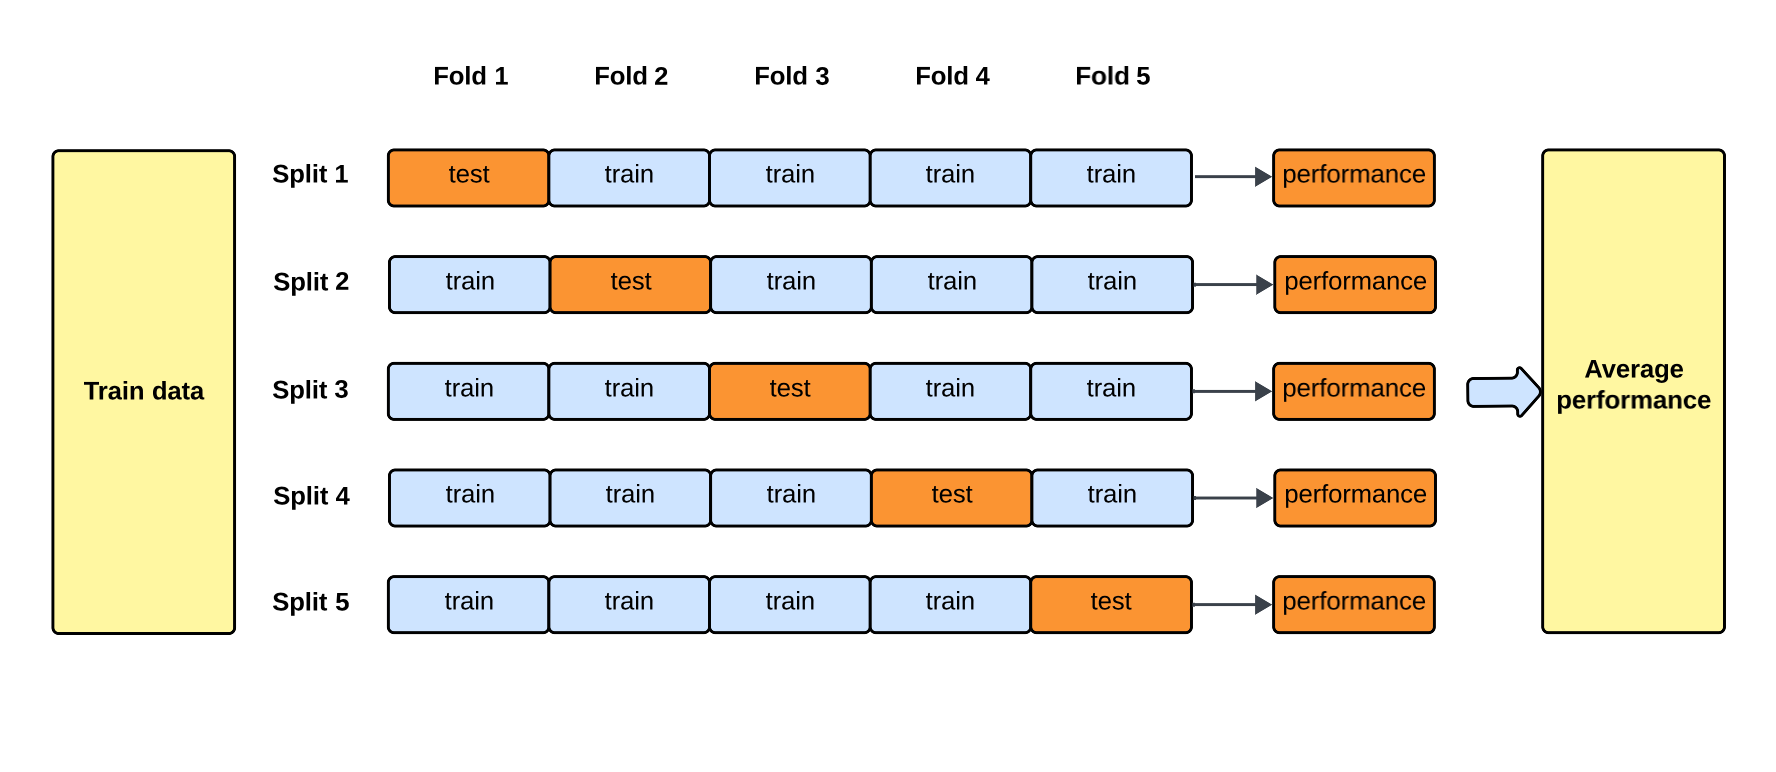

In [26]:
from sklearn.model_selection import cross_val_score

# 5 katlı çapraz doğrulama uygula
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') 
#model:seçilen ML model (örneğin RandomForestClassifier gibi)  X,y: Dependent ve Indep. variables
#cv=5: veriyi 5 e bölüp 5 kez test eder,  accuracy:modelin accuracy le değerlendirilimesini sağlar ( örneğin f1, recall da olaiblirdi)


# Çapraz doğrulama sonuçlarını yazdır
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy from Cross-Validation: {scores.mean()}')

Cross-Validation Scores: [0.79888268 0.81460674 0.84831461 0.78651685 0.82022472]
Mean Accuracy from Cross-Validation: 0.813709120582512


## Hiperparametre Optimizasyonu (GridSearchCV)  
Hiperparametreler, modelin performansını **doğrudan etkileyen ayarlardır** ve **optimum değerlerin belirlenmesi modelin doğruluğunu ve genelleme yeteneğini artırır**.  
Bu değerler, **eğitim sürecinde otomatik olarak öğrenilmez**, bu yüzden **deneme yanılma veya optimizasyon teknikleri ile en iyi parametre kombinasyonu bulunmalıdır**.  

**GridSearchCV**, belirlenen hiperparametre kombinasyonlarını sistematik olarak dener ve **en iyi sonucu veren ayarları otomatik olarak belirler**.  

**RandomizedSearchCV**, belirlenen hiperparametre aralıklarından rastgele örnekler seçerek daha hızlı bir optimizasyon süreci sağlar.  

Bunun yanı sıra, **Bayes Optimizasyonu, Genetik Algoritmalar ve Optuna gibi teknikler**, daha büyük parametre uzaylarında verimli arama yaparak hiperparametre optimizasyonunu daha etkili hale getirebilir.

### Hiperparametre Optimizasyonu Neden Önemlidir?  

**1. Modelin doğruluğunu artırır.**  
- **Yanlış seçilmiş hiperparametreler modelin performansını düşürebilir.**  
- **Doğru değerler ile model, hem eğitim hem de test verisi üzerinde daha iyi sonuçlar üretir.**  

**2. Overfitting ve Underfitting Önler.**  
- **Çok karmaşık modeller overfitting yapabilir, basit modeller ise underfitting sorunu yaşayabilir.**  
- **Doğru hiperparametrelerle modelin veriye en iyi şekilde uyum sağlaması sağlanır.**  

**3. Farklı hiperparametre kombinasyonlarını otomatik olarak test eder.**  
- **Elle parametre ayarlamak zaman alıcıdır, ancak GridSearchCV ile birçok kombinasyon hızlıca test edilir.**  
- **En iyi hiperparametrelerin seçilmesi, modelin daha genelleştirilmiş tahminler yapmasını sağlar.**  

**Sonuç olarak, hiperparametre optimizasyonu, modelin sadece eğitim verisinde değil, gerçek dünya verisinde de başarılı olmasını sağlamak için kritik bir adımdır.**

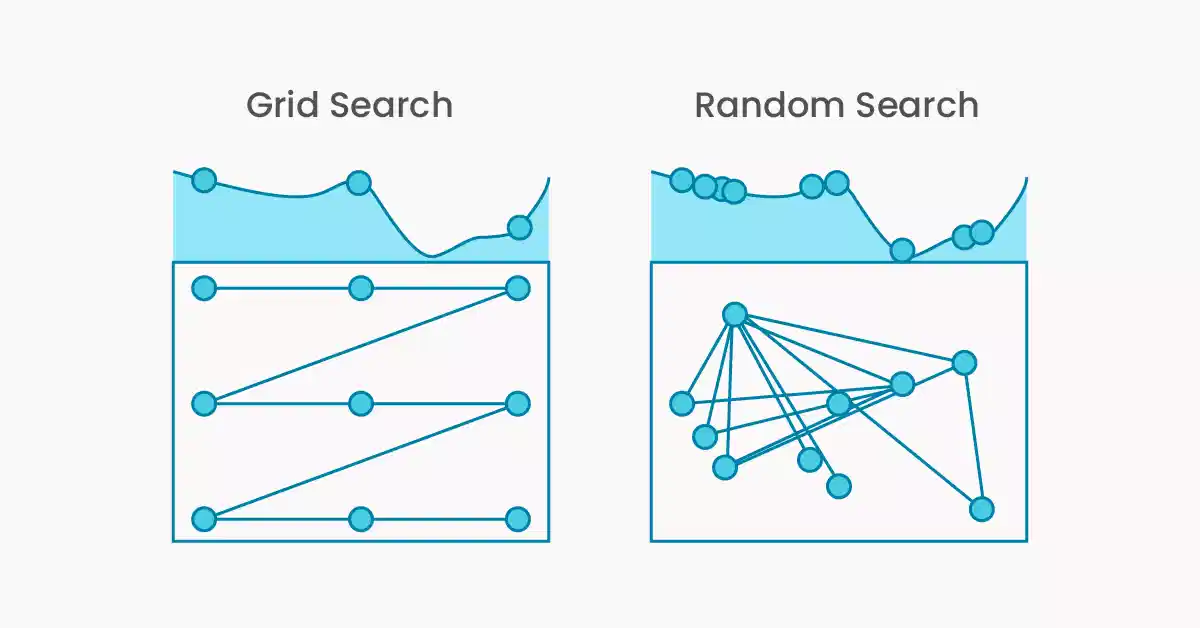

In [28]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre grid oluştur
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}

# n_estimators: Random Forest modelinde kaç adet karar ağacı kullanılacağını belirleyen hiperparametredir.Burada 50, 100 ve 200 ağaçlı modeller denenecek.
# max_depth: Ağaçların maksimum derinliğini belirler. 5, 10 ve sınırsız (None) derinlik değerleri denenerek en iyi derinlik seçilecek

# GridSearchCV ile en iyi parametreleri bul
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreleri yazdır
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 5, 'n_estimators': 100}


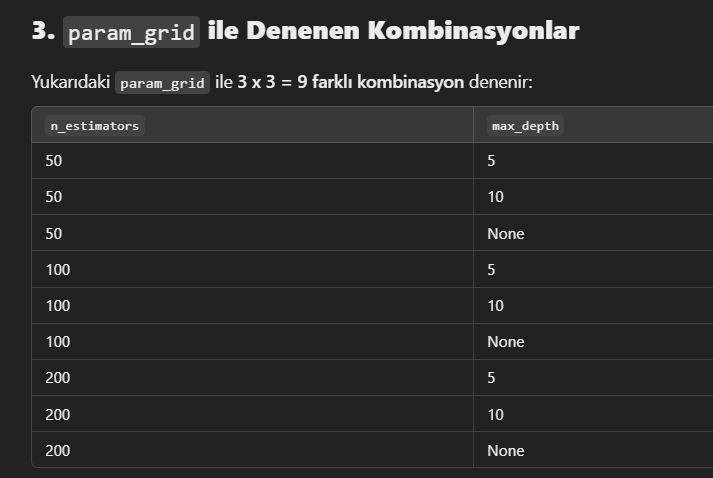

In [29]:
# Optimum modelin test seti üzerindeki performansı değerlendirilmelidir  
# Optimizasyon sonrası en iyi modelin doğruluğunu ölçüyoruz  

best_model = grid_search.best_estimator_     # GridSearchCV tarafından seçilen en iyi modeli alır.
y_pred_best = best_model.predict(X_test_scaled)  # Seçilen en iyi model ile test verisinde tahmin yapar.

print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")

Best Model Accuracy: 0.8156424581005587
